In [1]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import numpy as np

%matplotlib notebook

# Корреляции W=1

In [3]:
!ls *12*

W1_120_15_5_corr_point.txt  W1_120_20_5_corr_point.txt
W1_120_15_5_corr_super.txt  W1_120_20_5_corr_super.txt


In [2]:
lst = []
with open('W1_120_20_5_corr_super.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_super = pd.DataFrame(lst)

L, W = 120, 1

In [3]:
df_super

n1     n2        Re   Im
0       1.0    2.0  0.000591  0.0
1       1.0    3.0  0.000912  0.0
2       1.0    4.0  0.001043  0.0
3       1.0    5.0  0.000895  0.0
4       1.0    6.0  0.000460  0.0
...     ...    ...       ...  ...
7135  117.0  119.0  0.003279  0.0
7136  117.0  120.0  0.001040  0.0
7137  118.0  119.0  0.002803  0.0
7138  118.0  120.0  0.000910  0.0
7139  119.0  120.0  0.000590  0.0

[7140 rows x 4 columns]

In [5]:
x0 = L//2

df_p_cut = df_super[(df_super.n1 == x0)]
df_p_cut["rel_x"] = (df_p_cut.n2 - df_p_cut.n1).values.astype(int)
df_p_cut

<ipython-input-5-4846e7b059bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p_cut["rel_x"] = (df_p_cut.n2 - df_p_cut.n1).values.astype(int)


n1     n2        Re   Im  rel_x
5310  60.0   61.0  0.038985  0.0      1
5311  60.0   62.0  0.028583  0.0      2
5312  60.0   63.0  0.016536  0.0      3
5313  60.0   64.0  0.005482  0.0      4
5314  60.0   65.0 -0.003200  0.0      5
5315  60.0   66.0 -0.008879  0.0      6
5316  60.0   67.0 -0.011465  0.0      7
5317  60.0   68.0 -0.011325  0.0      8
5318  60.0   69.0 -0.009176  0.0      9
5319  60.0   70.0 -0.005903  0.0     10
5320  60.0   71.0 -0.002366  0.0     11
5321  60.0   72.0  0.000758  0.0     12
5322  60.0   73.0  0.003050  0.0     13
5323  60.0   74.0  0.004347  0.0     14
5324  60.0   75.0  0.004691  0.0     15
5325  60.0   76.0  0.004260  0.0     16
5326  60.0   77.0  0.003286  0.0     17
5327  60.0   78.0  0.002007  0.0     18
5328  60.0   79.0  0.000636  0.0     19
5329  60.0   80.0 -0.000651  0.0     20
5330  60.0   81.0 -0.001710  0.0     21
5331  60.0   82.0 -0.002425  0.0     22
5332  60.0   83.0 -0.002721  0.0     23
5333  60.0   84.0 -0.002574  0.0     24
5334  60.0   85.0 -0.002023  0.0     25
5335  60.0   86.0 -0.001179  0.0     26
5336  60.0   87.0 -0.000204  0.0     27
5337  60.0   88.0  0.000721  0.0     28
5338  60.0   89.0  0.001431  0.0     29
5339  60.0   90.0  0.001818  0.0     30
5340  60.0   91.0  0.001844  0.0     31
5341  60.0   92.0  0.001549  0.0     32
5342  60.0   93.0  0.001030  0.0     33
5343  60.0   94.0  0.000414  0.0     34
5344  60.0   95.0 -0.000177  0.0     35
5345  60.0   96.0 -0.000651  0.0     36
5346  60.0   97.0 -0.000955  0.0     37
5347  60.0   98.0 -0.001073  0.0     38
5348  60.0   99.0 -0.001017  0.0     39
5349  60.0  100.0 -0.000816  0.0     40
5350  60.0  101.0 -0.000507  0.0     41
5351  60.0  102.0 -0.000138  0.0     42
5352  60.0  103.0  0.000241  0.0     43
5353  60.0  104.0  0.000571  0.0     44
5354  60.0  105.0  0.000795  0.0     45
5355  60.0  106.0  0.000869  0.0     46
5356  60.0  107.0  0.000773  0.0     47
5357  60.0  108.0  0.000524  0.0     48
5358  60.0  109.0  0.000176  0.0     49
5359  60.0  110.0 -0.000186  0.0     50
5360  60.0  111.0 -0.000476  0.0     51
5361  60.0  112.0 -0.000626  0.0     52
5362  60.0  113.0 -0.000612  0.0     53
5363  60.0  114.0 -0.000454  0.0     54
5364  60.0  115.0 -0.000211  0.0     55
5365  60.0  116.0  0.000034  0.0     56
5366  60.0  117.0  0.000201  0.0     57
5367  60.0  118.0  0.000249  0.0     58
5368  60.0  119.0  0.000187  0.0     59
5369  60.0  120.0  0.000067  0.0     60

<IPython.core.display.Javascript object>


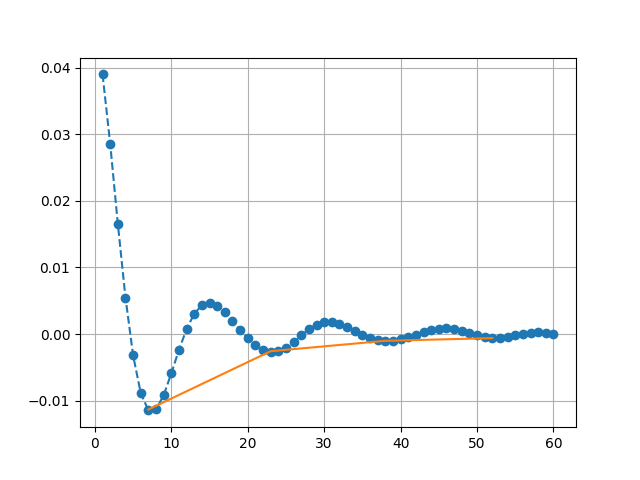

In [22]:
plt.plot(df_p_cut["n2"] - x0, df_p_cut.Re, 'o--')
plt.grid()

<IPython.core.display.Javascript object>


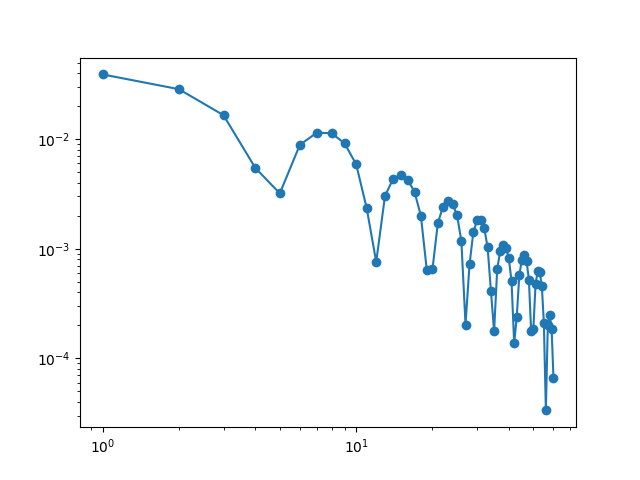

In [7]:
plt.loglog(df_p_cut["n2"] - x0, np.abs(df_p_cut.Re), 'o-')

In [11]:
(df_p_cut.n2-x0).values ,df_p_cut.Re.values

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60.]),
 array([ 3.89854246e-02,  2.85830093e-02,  1.65360371e-02,  5.48229806e-03,
        -3.20041291e-03, -8.87916481e-03, -1.14645861e-02, -1.13251502e-02,
        -9.17578914e-03, -5.90278658e-03, -2.36569007e-03,  7.58390980e-04,
         3.05010492e-03,  4.34676699e-03,  4.69143220e-03,  4.25950374e-03,
         3.28550258e-03,  2.00727474e-03,  6.36056259e-04, -6.51299936e-04,
        -1.70976347e-03, -2.42522887e-03, -2.72135753e-03, -2.57357087e-03,
        -2.02293129e-03, -1.17894846e-03, -2.03741682e-04,  7.20587009e-04,
         1.43108186e-03,  1.81781172e-03,  1.84416874e-03,  1.54905666e-03,
         1.03031781e-03,  4.14463484e-04, -1.76770

In [24]:
minima = []
vals = df_p_cut.Re.values
for j in range(1, vals.shape[0]-1):
    if (vals[j] < vals[j-1]) and (vals[j] < vals[j+1]):
        print(j, vals[j])
        minima.append(j+1)

6 -0.0114645861068318
22 -0.0027213575310906
37 -0.0010732163708734
51 -0.0006260984651641


In [25]:
minima

[7, 23, 38, 52]

<IPython.core.display.Javascript object>


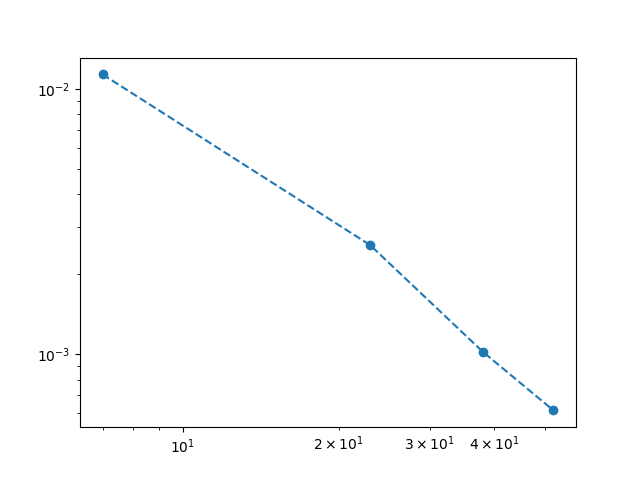

LinregressResult(slope=-1.7690297234284615, intercept=-0.42678832693220414, rvalue=-0.9993991894517449, pvalue=0.022069151787612363, stderr=0.061350014178630265, intercept_stderr=0.22027897222872703)

In [35]:
plt.loglog(minima, abs(vals[minima]), 'o--')
from scipy.stats import linregress

linregress(np.log(minima)[1:], np.log(abs(vals[minima]))[1:])

In [113]:
corr = df_p_cut.Re.values

In [107]:
four1 = np.zeros((L,))

for ikx in range(L):
    for x in range(x0+1, L+1):
        phase = 2*np.pi*(x-x0)*ikx / L
        term = corr[x-x0]               # FIXME: no, it starts from 1, not zero.

22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [105]:
x0

21.0

# Корреляции для W = 5


In [79]:
lst = []
i = 0
with open('Single_particle_W5_8_1.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

In [3]:
lst

[{'n1': 1.0, 'n2': 2.0, 'Re': 0.0062971, 'Im': 0.0},
 {'n1': 1.0, 'n2': 3.0, 'Re': 0.00726948, 'Im': 0.0},
 {'n1': 1.0, 'n2': 4.0, 'Re': 0.00628938, 'Im': 0.0},
 {'n1': 1.0, 'n2': 5.0, 'Re': 0.00362795, 'Im': 0.0},
 {'n1': 1.0, 'n2': 6.0, 'Re': 0.00650116, 'Im': 0.0},
 {'n1': 1.0, 'n2': 7.0, 'Re': 0.0112796, 'Im': 0.0},
 {'n1': 1.0, 'n2': 8.0, 'Re': 0.0130187, 'Im': 0.0},
 {'n1': 1.0, 'n2': 9.0, 'Re': 0.0112579, 'Im': 0.0},
 {'n1': 1.0, 'n2': 10.0, 'Re': 0.00649075, 'Im': 0.0},
 {'n1': 1.0, 'n2': 11.0, 'Re': 0.00801731, 'Im': 0.0},
 {'n1': 1.0, 'n2': 12.0, 'Re': 0.0139122, 'Im': 0.0},
 {'n1': 1.0, 'n2': 13.0, 'Re': 0.016066, 'Im': 0.0},
 {'n1': 1.0, 'n2': 14.0, 'Re': 0.0138928, 'Im': 0.0},
 {'n1': 1.0, 'n2': 15.0, 'Re': 0.00800717, 'Im': 0.0},
 {'n1': 1.0, 'n2': 16.0, 'Re': 0.00792984, 'Im': 0.0},
 {'n1': 1.0, 'n2': 17.0, 'Re': 0.0137602, 'Im': 0.0},
 {'n1': 1.0, 'n2': 18.0, 'Re': 0.0158983, 'Im': 0.0},
 {'n1': 1.0, 'n2': 19.0, 'Re': 0.0137506, 'Im': 0.0},
 {'n1': 1.0, 'n2': 20.0, 'Re'

In [80]:
L, W = 40, 5

In [81]:
def i2c(idx, W=W, L=L):
    r"""Convert the 1-based flat index into 0-based 2D (W, L) array indices.
    
    This is almost np.unravel_index, only 1-based:
    
        idx = (x+1) + y*L
        
    $x \in [0, L-1]$ and y\in [0, W-1]
    """
    x = (idx-1) % L
    y = (idx-1) // L
    return x, y

i2c(1, W, L) , i2c(40, W, L), i2c(41, W, L), i2c(80, W, L)

((0, 0), (39, 0), (0, 1), (39, 1))

In [82]:
def c2i(x, y): return x+1 + y*L

c2i(0, 0), c2i(39, 0), c2i(0, 1), c2i(39, 1)

(1, 40, 41, 80)

In [83]:
for entry in lst:
    entry["n1"] = int(entry["n1"])
    entry["n2"] = int(entry["n2"])
    entry["ix1"] = i2c(entry["n1"], W, L)
    entry["ix2"] = i2c(entry["n2"], W, L)

In [85]:
center_idx =  2*L + L//2
center_idx, i2c(center_idx)

(100, (19, 2))

In [84]:
corr = np.zeros((L, W), dtype=float)
corr[...] = np.nan

for entry in lst:
    if entry["n1"] != center_idx:
        continue
    ix, iy = entry["ix2"]
    corr[ix, iy] = entry["Re"]

with np.printoptions(linewidth=100):
    print(corr)

[[         nan          nan          nan -1.97984e-04  9.59346e-04]
 [         nan          nan          nan -6.21240e-04  1.65937e-03]
 [         nan          nan          nan -8.81649e-04  1.91474e-03]
 [         nan          nan          nan -6.27442e-04  1.65921e-03]
 [         nan          nan          nan -2.03183e-04  9.59204e-04]
 [         nan          nan          nan -1.92154e-03  5.68446e-04]
 [         nan          nan          nan -3.53891e-03  9.65638e-04]
 [         nan          nan          nan -4.21512e-03  1.10424e-03]
 [         nan          nan          nan -3.54990e-03  9.65562e-04]
 [         nan          nan          nan -1.92960e-03  5.68388e-04]
 [         nan          nan          nan -2.35229e-03  8.78304e-05]
 [         nan          nan          nan -4.17858e-03  1.31843e-04]
 [         nan          nan          nan -4.89130e-03  1.40785e-04]
 [         nan          nan          nan -4.18718e-03  1.31790e-04]
 [         nan          nan          nan -2.3587

In [92]:
for i, c in enumerate(corr[:, 3]):
    print(i, c)

0 -0.000197984
1 -0.00062124
2 -0.000881649
3 -0.000627442
4 -0.000203183
5 -0.00192154
6 -0.00353891
7 -0.00421512
8 -0.0035499
9 -0.0019296
10 -0.00235229
11 -0.00417858
12 -0.0048913
13 -0.00418718
14 -0.00235872
15 -0.00182856
16 -0.00317029
17 -0.00366677
18 -0.00317552
19 -0.00183263
20 -0.000839981
21 -0.00139433
22 -0.00157763
23 -0.00139708
24 -0.000842234
25 0.000153166
26 0.000343557
27 0.00044047
28 0.000342236
29 0.000152033
30 0.0008397
31 0.00151576
32 0.00178491
33 0.00151512
34 0.000839148
35 0.0010956
36 0.0019261
37 0.00224017
38 0.00192578
39 0.00109531


In [77]:
def fourier(corr, L, W):
    four = np.zeros((L, W))

    x0, y0 = i2c(center_idx)
    print(">>", x0, y0)
    x0 += 1
    
    for kx in range(L):
        for ky in range(W):
            for x in range(L):
                for y in range(W):
                    if x < x0 or y < y0:
                        continue
                    phase = 2*np.pi* (kx*(x-x0)/L + ky*(y-y0)/W)
                    term = corr[x, y]*np.cos(phase)
                    if np.isnan(term):
                        print(x, y)
                    four[kx, ky] += term
    return four

In [78]:
four = fourier(corr, L, W)
with np.printoptions(linewidth=120):
    print(four)

>> 19 2
[[ 0.25301897  0.27684231  0.246424    0.246424    0.27684231]
 [ 0.08600958  0.09938653  0.0976186   0.13009358  0.10342834]
 [ 0.00405737  0.01811645  0.01839301  0.0083589  -0.00711194]
 [ 0.01448071  0.01820373  0.01455002  0.018346    0.01421735]
 [ 0.00972069  0.01828955  0.01658285  0.01076933  0.00507295]
 [ 0.01229484  0.01489501  0.01115115  0.01344435  0.01164647]
 [ 0.01619505  0.02545545  0.02241245  0.01573352  0.01271627]
 [ 0.00552357  0.00632505 -0.00707401 -0.00029367  0.00192414]
 [-0.04170855 -0.04542623 -0.04280428 -0.03746624 -0.04508282]
 [-0.01598496 -0.01656159 -0.01557496 -0.01861045 -0.01875063]
 [-0.00099954 -0.00093858 -0.00095881 -0.00105638 -0.00109883]
 [ 0.00272996  0.00313407  0.00293323  0.00309654  0.0029426 ]
 [ 0.0028417   0.0040271   0.00442868  0.00395032  0.00296955]
 [ 0.00515408  0.00586383  0.00538337  0.00552282  0.00542568]
 [ 0.00521571  0.00705296  0.00765635  0.00653588  0.0055228 ]
 [ 0.00793871  0.00943928  0.00707595  0.006995

In [68]:
four1 = fourier(corr[:, 3], L, 1)
print(four1)

>> 19 2
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


<IPython.core.display.Javascript object>


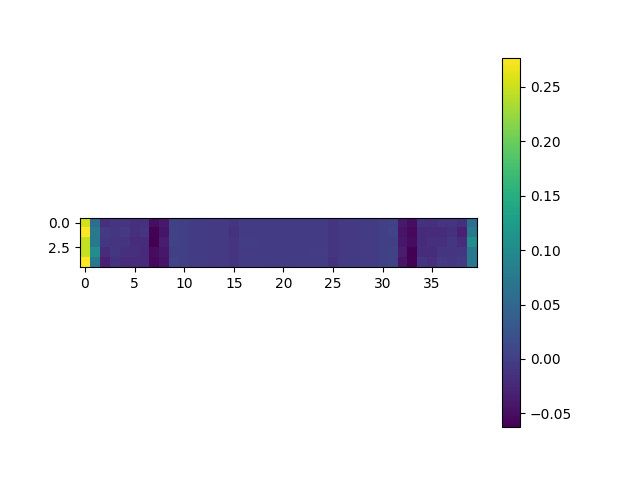

In [70]:
plt.imshow(four.T)
plt.colorbar()

<IPython.core.display.Javascript object>


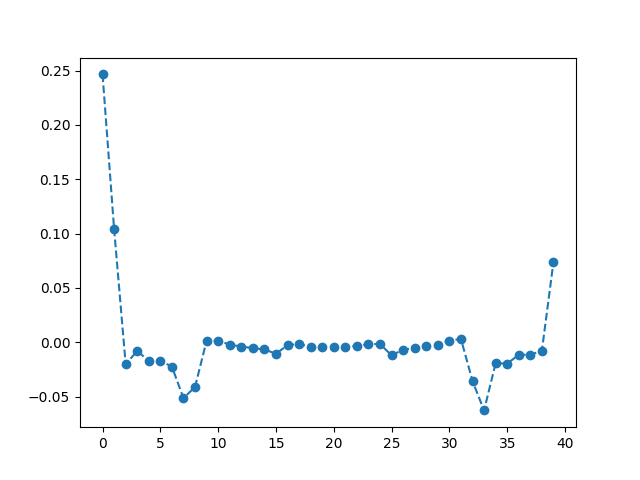

In [74]:
plt.plot(four[:, 3], 'o--')

<IPython.core.display.Javascript object>


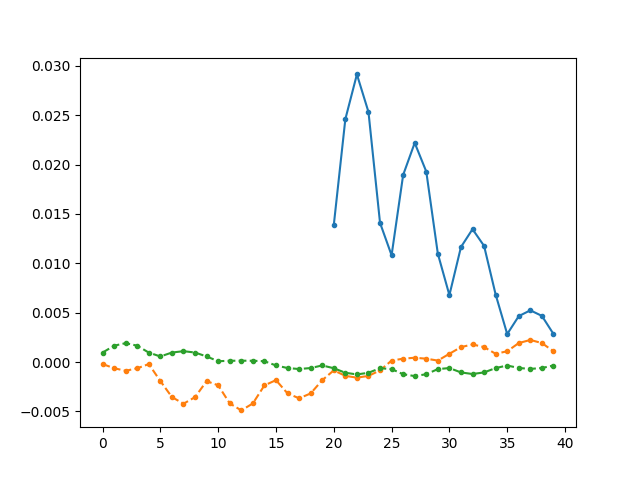

In [73]:
plt.plot(corr[:, 2], '.-')
plt.plot(corr[:, 3], '.--')
plt.plot(corr[:, 4], '.--')

<IPython.core.display.Javascript object>


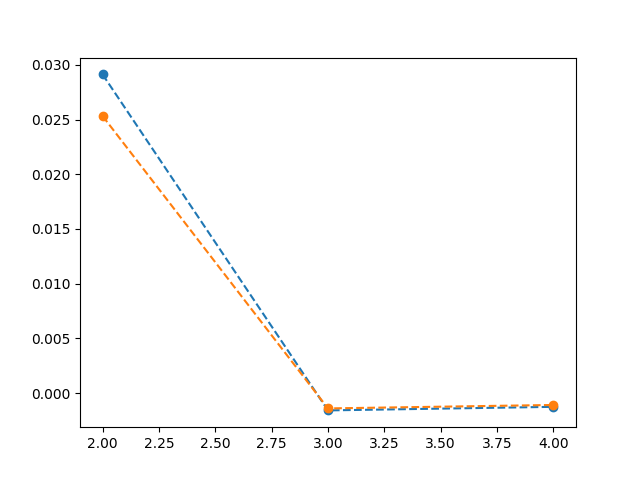

In [58]:
plt.plot(corr[22, :], 'o--', corr[23, :], 'o--')

In [42]:
corr.shape

(40, 5)

In [14]:
ns = df_n[(df_n.n1 == 21)].Re.tolist()
superc = df_super[(df_super.n1 == 21)].Re.tolist()
particle = df_particle[(df_particle.n1 == 21)].Re.tolist()

In [15]:
import numpy as np

Text(0.5, 1.0, 'Single-particle two-point correlators single chain')

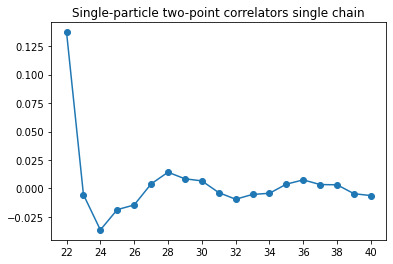

In [44]:
ax = plt.figure().gca()
# plt.plot(list(range(22,41)), 
#          ns)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.title('<n|n> correlations single chain')

# ax = plt.figure().gca()
# plt.plot(list(range(22,41)), 
#          superc)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.title('Superconducting pair correlations single chain')

# ax = plt.figure().gca()

# [2::4]
plt.plot(list(range(22,41))
#          [2::4]
         , 
#          np.abs(
         superc
#          [2::4]
#         )
         ,
         'o-'
)
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Single-particle two-point correlators single chain')

# Сделаем fft

[отсюда](https://docs.scipy.org/doc/scipy/tutorial/fft.html#d-discrete-fourier-transforms)

## L = 40, $N_{\uparrow} = 20,N_{\downarrow} = 10$

## Период 4


### TODO: Написать коррелятор для U = 0 должен быть 1/x^2 * cos(...)


### Не брать соизмеримые числа. 


In [22]:
import math 
import numpy as np

In [40]:
data = np.linspace(1,20, 20)
data2 = np.cos(data)

In [41]:
from scipy.fft import fft, fftfreq

In [42]:
len(data2)

20

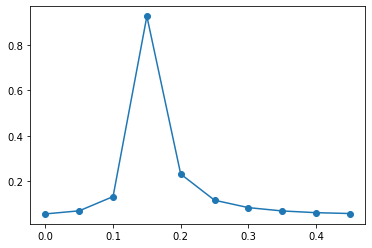

In [43]:
xf, yf, yf_for_graph = run_fft(data2, 20, 1)

In [39]:
math.pi/20

0.15707963267948966

In [17]:
import math
2*(math.pi*20/40 - math.pi*10/40), 2*(math.pi*20/40 + math.pi*10/40)

(1.5707963267948966, 4.71238898038469)

In [18]:
from scipy.fft import fft, fftfreq

In [45]:
def run_fft(data: list, N: int, T:int):
    yf = fft(data)
    xf = fftfreq(N, T)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf)[0:N//2], 'o-')
    return xf, yf, 2.0/N * np.abs(yf)[0:N//2]

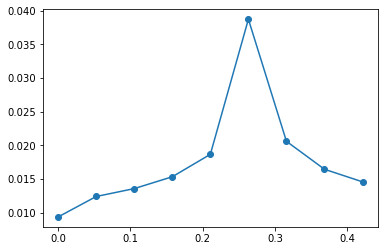

In [46]:
xf, yf, yf_for_graph = run_fft(particle, 19, 1)

In [47]:
xf[5]

0.2631578947368421

In [49]:
512350 * 0.87

445744.5

## Перешкалировать в 1 зону Бр. (то бишь квазиимпульсы)

# И то же самое для сверхпроводящего

## L = 40, $N_{\uparrow} = 20,N_{\downarrow} = 10$

## Период 4

Text(0.5, 1.0, 'Superconducting pair correlations single chain')

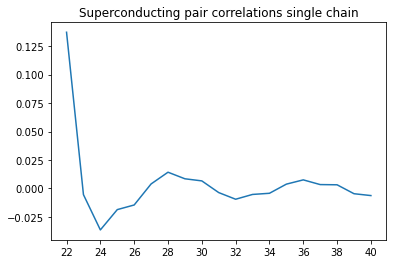

In [97]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(list(range(22,41)), 
         superc)
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.title('Superconducting pair correlations single chain')

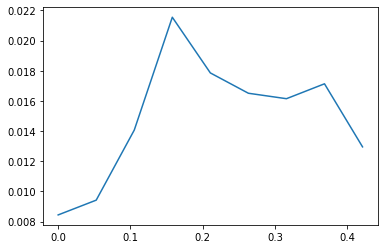

In [126]:
run_fft(superc, 19, 1)

# 30, 10

In [132]:
lst = []
i = 0
with open('Density_W1_30_10.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_n = pd.DataFrame(lst)

lst = []
with open('Superconducting_W1_30_10.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_super = pd.DataFrame(lst)

lst = []
with open('Single_particle_W1_30_10.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_particle = pd.DataFrame(lst)

Text(0.5, 1.0, 'Single-particle two-point correlators single chain')

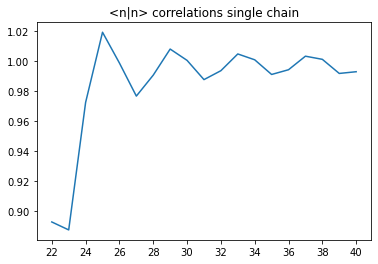

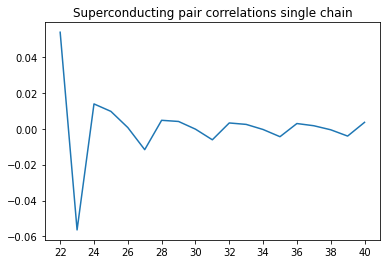

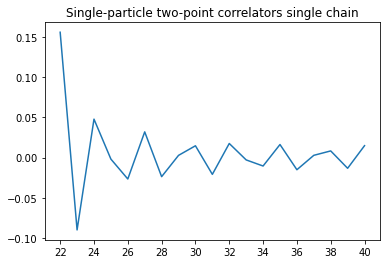

In [133]:
ns = df_n[(df_n.n1 == 21)].Re.tolist()
superc = df_super[(df_super.n1 == 21)].Re.tolist()
particle = df_particle[(df_particle.n1 == 21)].Re.tolist()

ax = plt.figure().gca()
plt.plot(list(range(22,41)), 
         ns)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('<n|n> correlations single chain')

ax = plt.figure().gca()
plt.plot(list(range(22,41)), 
         superc)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Superconducting pair correlations single chain')

ax = plt.figure().gca()
plt.plot(list(range(22,41)), 
         particle)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Single-particle two-point correlators single chain')

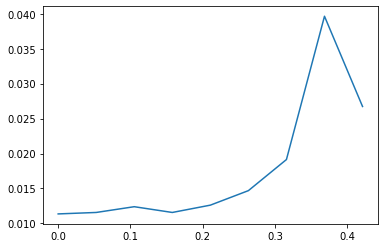

In [136]:
xf, yf, yf_for_graph = run_fft(particle, 19, 1)

# Сверхпроводящий

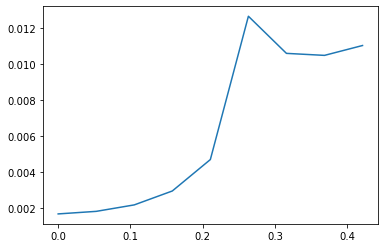

In [137]:
xf, yf, yf_for_graph = run_fft(superc, 19, 1)

# 15, 5

In [144]:
lst = []
i = 0
with open('Density_W1_15_5.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_n = pd.DataFrame(lst)

lst = []
with open('Superconducting_W1_15_5.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_super = pd.DataFrame(lst)

lst = []
with open('Single_particle_W1_15_5.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_particle = pd.DataFrame(lst)

Text(0.5, 1.0, 'Single-particle two-point correlators single chain')

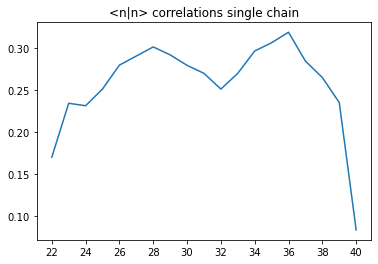

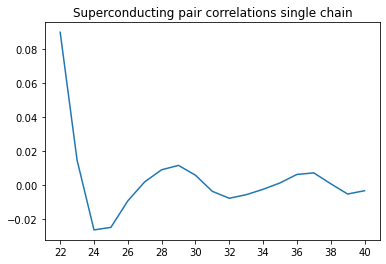

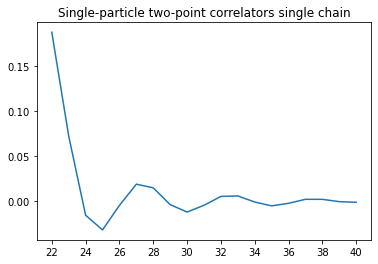

In [145]:
ns = df_n[(df_n.n1 == 21)].Re.tolist()
superc = df_super[(df_super.n1 == 21)].Re.tolist()
particle = df_particle[(df_particle.n1 == 21)].Re.tolist()

ax = plt.figure().gca()
plt.plot(list(range(22,41)), 
         ns)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('<n|n> correlations single chain')

ax = plt.figure().gca()
plt.plot(list(range(22,41)), 
         superc)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Superconducting pair correlations single chain')

ax = plt.figure().gca()
plt.plot(list(range(22,41)), 
         particle)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Single-particle two-point correlators single chain')

In [146]:
import math
2*(math.pi*15/40 - math.pi*5/40), math.pi

(1.5707963267948966, 3.141592653589793)

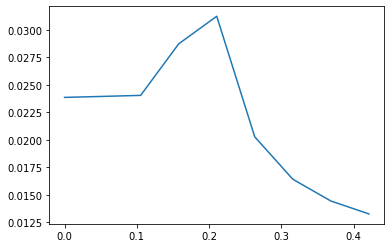

In [147]:
xf, yf, yf_for_graph = run_fft(particle, 19, 1)

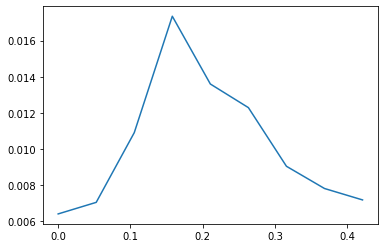

In [148]:
xf, yf, yf_for_graph = run_fft(superc, 19, 1)

# 20, 2

In [149]:
lst = []
i = 0
with open('Density_W1_20_2.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_n = pd.DataFrame(lst)

lst = []
with open('Superconducting_W1_20_2.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_super = pd.DataFrame(lst)

lst = []
with open('Single_particle_W1_20_2.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_particle = pd.DataFrame(lst)

Text(0.5, 1.0, 'Single-particle two-point correlators single chain')

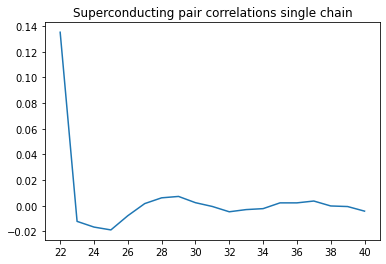

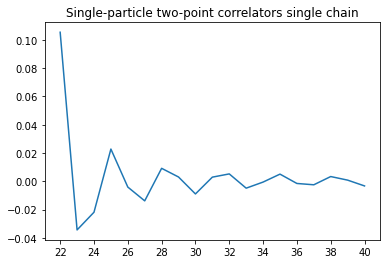

In [155]:
ns = df_n[(df_n.n1 == 21)].Re.tolist()
superc = df_super[(df_super.n1 == 21)].Re.tolist()
particle = df_particle[(df_particle.n1 == 21)].Re.tolist()

# ax = plt.figure().gca()
# plt.plot(list(range(22,41)), 
#          ns)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.title('<n|n> correlations single chain')

ax = plt.figure().gca()
plt.plot(list(range(22,41)), 
         superc)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Superconducting pair correlations single chain')

ax = plt.figure().gca()
plt.plot(list(range(22,41)), 
         particle)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Single-particle two-point correlators single chain')

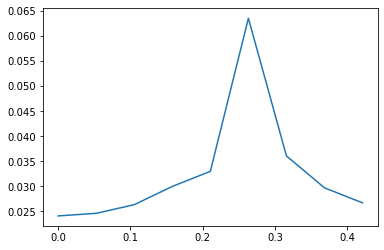

In [151]:
xf, yf, yf_for_graph = run_fft(particle, 19, 1)

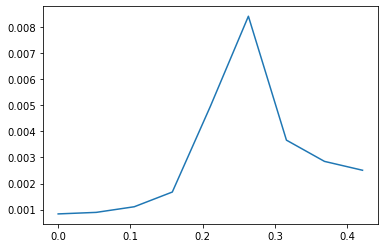

In [152]:
xf, yf, yf_for_graph = run_fft(superc, 19, 1)

# Одна нога 25, 15

In [162]:
lst = []
with open('Superconducting_W1_25_15.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_super = pd.DataFrame(lst)

lst = []
with open('Single_particle_W1_25_15.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_particle = pd.DataFrame(lst)

Text(0.5, 1.0, 'One_particle_W1_25_15 correlations')

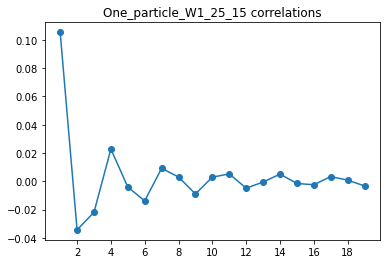

In [163]:
cor = df_particle[(df_super.n1 == 21)].Re.tolist()
ax = plt.figure().gca()
plt.plot(list(range(1,20)), 
         cor,'o-')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('One_particle_W1_25_15 correlations')

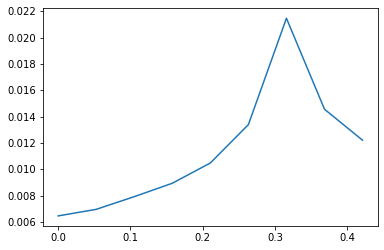

In [164]:
xf, yf, yf_for_graph = run_fft(cor, 19, 1)

Text(0.5, 1.0, 'Superconducting_W1_25_15 correlations')

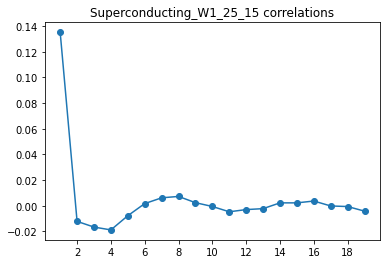

In [165]:
cor = df_super[(df_super.n1 == 21)].Re.tolist()
ax = plt.figure().gca()
plt.plot(list(range(1,20)), 
         cor,'o-')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Superconducting_W1_25_15 correlations')

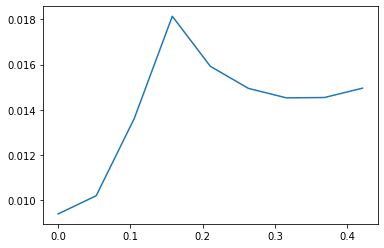

In [166]:
xf, yf, yf_for_graph = run_fft(cor, 19, 1)

# W2 20,4

In [19]:
lst = []
i = 0
with open('Density_W2_20_10.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_n = pd.DataFrame(lst)

lst = []
with open('Superconducting_W2_20_10.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_super = pd.DataFrame(lst)

lst = []
with open('Single_particle_W2_20_10.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_particle = pd.DataFrame(lst)

Text(0.5, 1.0, 'Superconducting_W2_20_10 correlations on upper leg')

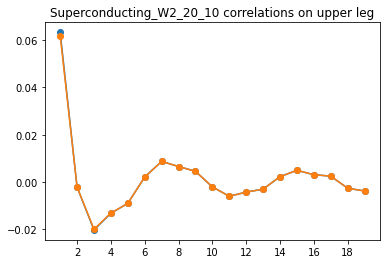

In [20]:
cor = df_super[(df_super.n1 == 41) & (df_super.n2%2 ==1)].Re.tolist()
ax = plt.figure().gca()
plt.plot(list(range(1,20)), 
         cor, 'o-')
cor2 = df_super[(df_super.n1 == 41) & (df_super.n2%2 ==0)].Re.tolist()[1:]
plt.plot(list(range(1,20)), 
         cor2, 'o-')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Superconducting_W2_20_10 correlations on upper leg')

Text(0.5, 1.0, 'Density_W2_50_20 correlations on lower leg')

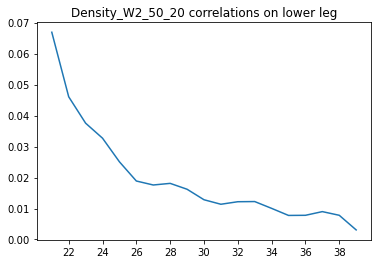

In [159]:
cor = df_super[(df_super.n1 == 41) & (df_super.n2%2 ==0)].Re.tolist()
ax = plt.figure().gca()
plt.plot(list(range(21,40)), 
         cor2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Density_W2_50_20 correlations on lower leg')

Text(0.5, 1.0, 'Superconducting_W2_50_20 correlations on upper leg')

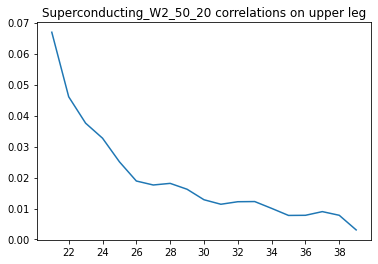

In [161]:
cor = df_super[(df_super.n1 == 41) & (df_super.n2%2 ==1)].Re.tolist()
ax = plt.figure().gca()
plt.plot(list(range(21,40)), 
         cor2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Superconducting_W2_50_20 correlations on upper leg')

Text(0.5, 1.0, 'Single_particle_W2_50_20 correlations on upper leg')

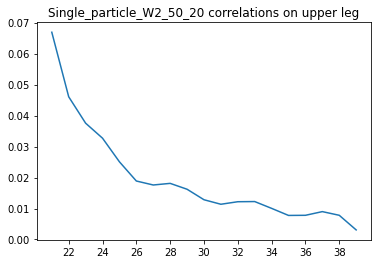

In [162]:
cor = df_particle[(df_particle.n1 == 41) & (df_particle.n2%2 ==1)].Re.tolist()
ax = plt.figure().gca()
plt.plot(list(range(21,40)), 
         cor2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Single_particle_W2_50_20 correlations on upper leg')

In [164]:
#4

import math
math.pi*70/80

2.748893571891069

In [168]:
2*(math.pi*50/40 - math.pi*20/40)

4.71238898038469

# Одна нога 15, 5


In [256]:
lst = []
with open('Superconducting_W1_15_5.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_super1 = pd.DataFrame(lst)

lst = []
with open('Single_particle_W1_15_5.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_particle = pd.DataFrame(lst)

In [257]:
len(cor)

20

Text(0.5, 1.0, 'Superconducting_W1_15_5 correlations')

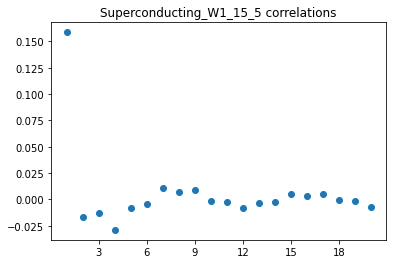

In [258]:
cor = df_super[(df_super.n1 == 20)].Re.tolist()
ax = plt.figure().gca()
plt.plot(list(range(1,21)), 
         cor,'o')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Superconducting_W1_15_5 correlations')

In [184]:
2*(math.pi*15/40 - math.pi*5/40), 2*math.pi*20/40

(1.5707963267948966, 3.141592653589793)

# Одна нога 30, 10

In [249]:
lst = []
with open('Superconducting_W1_30_10.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_super = pd.DataFrame(lst)

lst = []
with open('Single_particle_W1_30_10.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_particle = pd.DataFrame(lst)

Text(0.5, 1.0, 'Superconducting_W1_30_10 correlations')

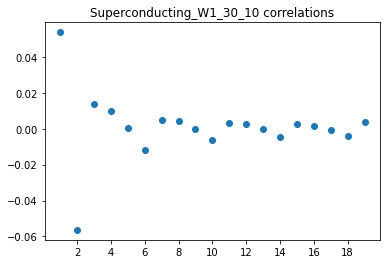

In [250]:
cor = df_super[(df_super.n1 == 21)].Re.tolist()
ax = plt.figure().gca()
plt.plot(list(range(1,20)), 
         cor,
          'o')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Superconducting_W1_30_10 correlations')

In [208]:
2*(math.pi*30/40 - math.pi*10/40), 2*math.pi*40/40

(3.141592653589793, 6.283185307179586)

# Одна нога 20, 5

Text(0.5, 1.0, 'Superconducting_W1_20_5 correlations')

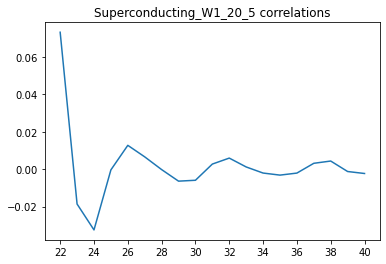

In [210]:
cor = df_super[(df_super.n1 == 21)].Re.tolist()
ax = plt.figure().gca()
plt.plot(list(range(1,20)), 
         cor)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Superconducting_W1_20_5 correlations')

In [215]:
2*(math.pi*20/40 - math.pi*5/40), 2*math.pi*25/40

(2.356194490192345, 3.9269908169872414)

# Одна нога 20, 10

Text(0.5, 1.0, 'Superconducting_W1_20_10 correlations')

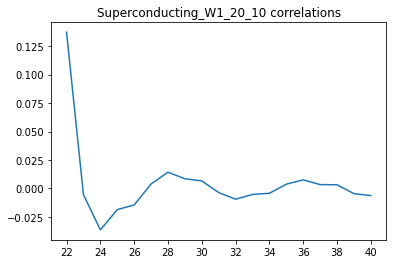

In [217]:
lst = []
with open('Superconducting_W1_20_10.txt') as f:
    for line in f:
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))

df_super = pd.DataFrame(lst)
cor = df_super[(df_super.n1 == 21)].Re.tolist()
ax = plt.figure().gca()
plt.plot(list(range(22,41)), 
         cor)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Superconducting_W1_20_10 correlations')

In [218]:
2*(math.pi*20/40 - math.pi*10/40), 2*math.pi*30/40

(1.5707963267948966, 4.71238898038469)